In [80]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [81]:
profile = pd.read_csv('Customer_DF (1).csv')
profile.head()

,Sr no.,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [149]:
transactions = pd.read_csv('cust_transaction_details (1).csv')
transactions.head()

,Sr no.,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [150]:
profile.isna().sum()

Sr no.                    0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

The data is already cleaned.

In [84]:
len(profile.customerEmail.unique())

161

In [85]:
transactions.isna().sum()

Sr no.                              0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

The data is already clean.

In [86]:
len(transactions.customerEmail.unique())

136

### There are total 161 customers in the profile data out of which only 136 customers have transaction records.Hence, we are going to predict fraud detection for only those 136 customers.

In [87]:
print(profile.shape)
print(transactions.shape)

(168, 10)
(623, 11)


In [88]:
profile['Fraud'].value_counts()

False    107
True      61
Name: Fraud, dtype: int64

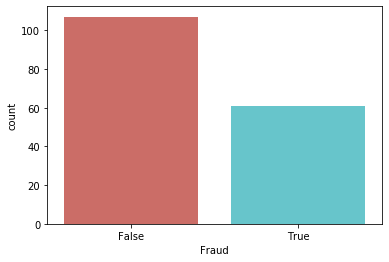

<Figure size 432x288 with 0 Axes>

In [89]:
sns.countplot(x='Fraud',data=profile, palette='hls')
plt.show()
plt.savefig('count_plot')

In [90]:
profile.groupby('Fraud').mean()

,Sr no.,No_Transactions,No_Orders,No_Payments
Fraud,,,,
False,81.186916,3.420561,2.495327,1.467290
True,87.557377,4.213115,3.459016,3.032787


Observations:

The total number of fraud is less less than the honest people. The number of transactions of honest people is less than the fraud people. Also the no. of orders as well as payments is in less amount of the honest people. Therefore, as the number of transactions, orders, payments increase, The fraud increases. 

In [91]:
transactions.groupby('paymentMethodType').mean()

,Sr no.,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
paymentMethodType,,,,
apple pay,310.857143,0.061224,36.979592,0.265306
bitcoin,256.659574,0.404255,34.957447,0.234043
card,311.891441,0.121086,34.929019,0.279749
paypal,355.458333,0.041667,28.520833,0.208333


In [92]:
transactions.groupby('transactionFailed').mean()

,Sr no.,paymentMethodRegistrationFailure,transactionAmount
transactionFailed,,,
0,314.428571,0.131868,34.569231
1,301.714286,0.130952,34.678571


In [93]:
transactions.groupby('orderState').mean()

,Sr no.,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
orderState,,,,
failed,300.365079,0.111111,36.333333,0.222222
fulfilled,312.750000,0.135659,34.467054,0.263566
pending,305.704545,0.113636,33.659091,0.409091


In [94]:
transactions.groupby('paymentMethodProvider').mean()

,Sr no.,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
paymentMethodProvider,,,,
American Express,274.822222,0.200000,31.622222,0.266667
Diners Club / Carte Blanche,401.844828,0.189655,32.103448,0.362069
Discover,198.073171,0.195122,27.512195,0.414634
JCB 15 digit,313.533333,0.000000,35.866667,0.355556
JCB 16 digit,324.449153,0.101695,36.940678,0.203390
Maestro,328.057971,0.144928,31.681159,0.260870
Mastercard,297.531250,0.000000,35.906250,0.218750
VISA 13 digit,404.379310,0.379310,38.172414,0.362069
VISA 16 digit,239.427083,0.104167,38.375000,0.187500


# VISUALIZATION

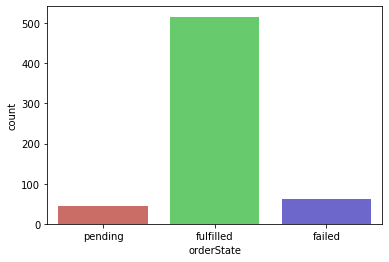

<Figure size 432x288 with 0 Axes>

In [95]:
sns.countplot(x='orderState',data=transactions, palette='hls')
plt.show()
plt.savefig('count_plot')

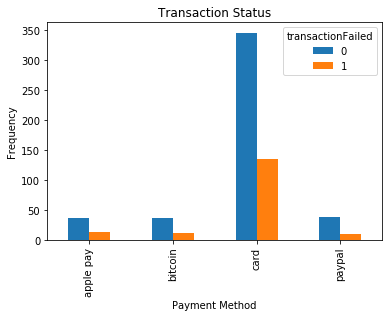

In [96]:
%matplotlib inline
pd.crosstab(transactions.paymentMethodType,transactions.transactionFailed).plot(kind='bar')
plt.title('Transaction Status')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.savefig('Trans')

The payment method plays an important role to determine the status of transaction. The number of succesful transactions is greater than failure in case of every payment method.

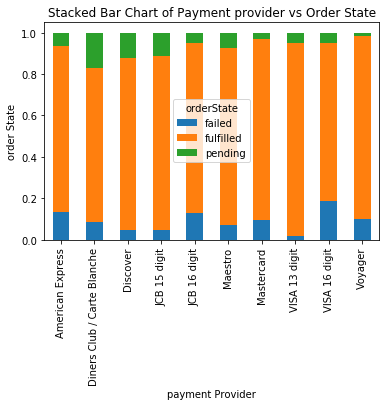

In [97]:
table=pd.crosstab(transactions.paymentMethodProvider,transactions.orderState)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Payment provider vs Order State')
plt.xlabel('payment Provider')
plt.ylabel('order State')
plt.savefig('g2')

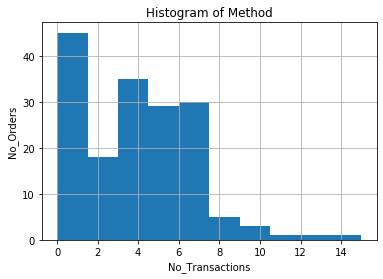

In [98]:
profile.No_Transactions.hist()
plt.title('Histogram of Method')
plt.xlabel('No_Transactions')
plt.ylabel('No_Orders')
plt.savefig('hist')

# IMPLEMENTING THE MODEL

In [99]:
# combining profile and transactions data
merged = transactions.merge(profile, on='customerEmail')
print(merged.shape)
merged.head()


(819, 20)


,Sr no._x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Sr no._y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True


In [100]:
len(merged.customerEmail.unique())

136

In [101]:
merged.Fraud.value_counts()

True     453
False    366
Name: Fraud, dtype: int64

In [102]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 20 columns):
Sr no._x                            819 non-null int64
customerEmail                       819 non-null object
transactionId                       819 non-null object
orderId                             819 non-null object
paymentMethodId                     819 non-null object
paymentMethodRegistrationFailure    819 non-null int64
paymentMethodType                   819 non-null object
paymentMethodProvider               819 non-null object
transactionAmount                   819 non-null int64
transactionFailed                   819 non-null int64
orderState                          819 non-null object
Sr no._y                            819 non-null int64
customerPhone                       819 non-null object
customerDevice                      819 non-null object
customerIPAddress                   819 non-null object
customerBillingAddress              819 non-null object
No_T

In [103]:
merged.paymentMethodProvider.unique()

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

### Features significant in determining the Fraud  

In [104]:
# selecting columns that are useful for building a model
df = merged[['paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
             'transactionFailed', 'orderState', 'No_Transactions', 'No_Orders', 'No_Payments', 'Fraud']]

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 10 columns):
paymentMethodRegistrationFailure    819 non-null int64
paymentMethodType                   819 non-null object
paymentMethodProvider               819 non-null object
transactionAmount                   819 non-null int64
transactionFailed                   819 non-null int64
orderState                          819 non-null object
No_Transactions                     819 non-null int64
No_Orders                           819 non-null int64
No_Payments                         819 non-null int64
Fraud                               819 non-null bool
dtypes: bool(1), int64(6), object(3)
memory usage: 64.8+ KB


# Label enconding the Object data

In [106]:
# Converting the object datatypes in to int
le = LabelEncoder() 
  
df['Fraud'] = le.fit_transform(df['Fraud']) 
df['orderState'] = le.fit_transform(df['orderState']) 
df['paymentMethodType'] = le.fit_transform(df['paymentMethodType']) 
df['paymentMethodProvider'] = le.fit_transform(df['paymentMethodProvider']) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [107]:
df.head()

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
0,1,2,4,18,0,2,2,2,1,0
1,1,2,4,26,0,1,2,2,1,0
2,0,1,0,45,0,1,3,3,7,1
3,0,1,0,23,0,1,3,3,7,1
4,1,1,8,43,1,1,3,3,7,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 10 columns):
paymentMethodRegistrationFailure    819 non-null int64
paymentMethodType                   819 non-null int32
paymentMethodProvider               819 non-null int32
transactionAmount                   819 non-null int64
transactionFailed                   819 non-null int64
orderState                          819 non-null int32
No_Transactions                     819 non-null int64
No_Orders                           819 non-null int64
No_Payments                         819 non-null int64
Fraud                               819 non-null int64
dtypes: int32(3), int64(7)
memory usage: 60.8 KB


In [109]:
X = df.drop('Fraud', axis=1)
Y = df['Fraud']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.4, random_state=42)

In [111]:
rf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=200, random_state=1) 

In [112]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=200,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

# Predicting on Train Set

In [113]:
train_pred = rf.predict(X_train)

In [125]:
train_accuracy = accuracy_score(train_pred, y_train) * 100
train_accuracy

100.0

# Predicting on Test Set

In [127]:
test_pred = rf.predict(X_test)

In [133]:
test_accuracy = accuracy_score(test_pred, y_test)
print("The accuracy of Random Forest Classification on test set is:",test_accuracy)

The accuracy of Random Forest Classification on test set is: 0.8567073170731707


# Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred)
print(confusion_matrix)

[[122  24]
 [ 23 159]]


The results shows that there are 122+159 correct predictions and 23+24 incorrect predictions.

## Precision, Recall, F-measure and Support

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       146
           1       0.87      0.87      0.87       182

    accuracy                           0.86       328
   macro avg       0.86      0.85      0.85       328
weighted avg       0.86      0.86      0.86       328



## Plotting Feature importance for predicting fraud detection according to our model

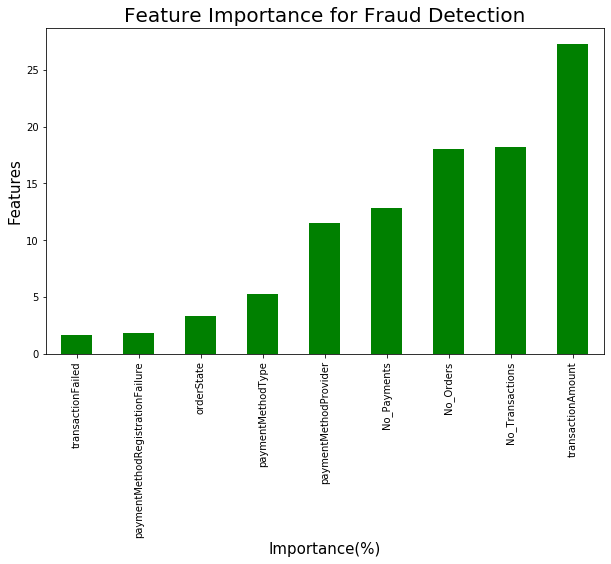

In [158]:
importances_rf = pd.Series(rf.feature_importances_ *100 , index = X.columns) 
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='bar', color='green', figsize=(10,6)); 
plt.xlabel('Importance(%)',size=15);
plt.ylabel('Features',size=15);
plt.title('Feature Importance for Fraud Detection',size=20)
plt.show();

Hence, the most important feature in detecting the fraud is transaction amount. Then the no of transactions and no of orders almost have similar importance. The no of payments have least importance among the three of them.